In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [34]:
file = "e:\\course-ML-with-Python-IBM\\Decision Trees\\dataset\\drug200.csv"
df = pd.read_csv(file)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [36]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

Here, we can see that 4 of our features have categorical data. So, we need to encode them. For this purpose, we can use Label encoder.

In [37]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [38]:
df['Sex'] = encoder.fit_transform(df['Sex'])
df['BP'] = encoder.fit_transform(df['BP'])
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 9.5+ KB


We have converted the features into numeric. Now, we can create a map for the Traget variable before encoding it. 

In [39]:
target_map = {'drugA':0,'drugB':1,'drugC':2,'drugX':3,'drugY':4}
df['Drug_Num'] = df['Drug'].map(target_map)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_Num
0,23,0,0,0,25.355,drugY,4
1,47,1,1,0,13.093,drugC,2
2,47,1,1,0,10.114,drugC,2
3,28,0,2,0,7.798,drugX,3
4,61,0,1,0,18.043,drugY,4


Now, we have completed our preprocessing. Now, we can create and train our model.

In [40]:
df.drop(['Drug'], axis=1).corr().round(2)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Num
Age,1.00,0.10,0.05,-0.07,-0.06,-0.00
Sex,0.10,1.00,-0.01,-0.01,-0.13,-0.10
BP,0.05,-0.01,1.00,-0.14,-0.15,0.37
Cholesterol,-0.07,-0.01,-0.14,1.00,0.01,0.06
Na_to_K,-0.06,-0.13,-0.15,0.01,1.00,0.59
Drug_Num,-0.00,-0.10,0.37,0.06,0.59,1.00


From the above correlation matrix, we can see that the drug is dependant on Na_to_K and the BP. We can also see the distribution of data by the following code.

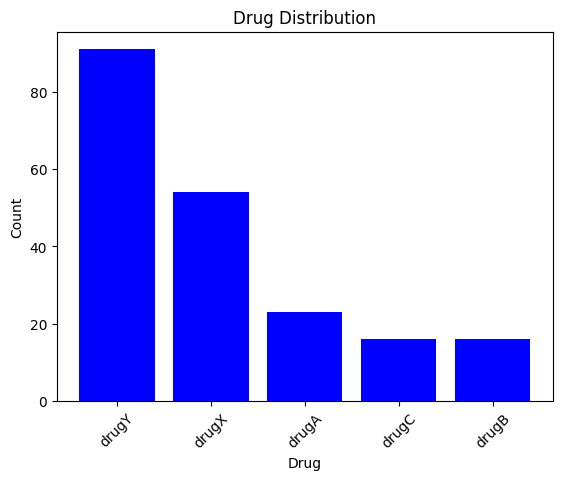

In [41]:
value_count = df['Drug'].value_counts()

plt.bar(value_count.index, value_count.values, color = 'b')
plt.xlabel("Drug")
plt.ylabel("Count")
plt.title("Drug Distribution")
plt.xticks(rotation = 45)
plt.show()

This shows that the most of the entries are for Drug Y and X.

In [42]:
X = df.drop(['Drug', 'Drug_Num'], axis=1)
y = df['Drug']

In [73]:
#Splitting the data.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [74]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [75]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Now, we have trained our model. Now we can evaluate it.

In [76]:
y_pred = model.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score

print(f"Accuracy = {accuracy_score(y_test, y_pred) * 100} %")

Accuracy = 98.33333333333333 %


We can see that our model has an excellent accuracy of 98%. We can also visualize our Decision Tree as follows

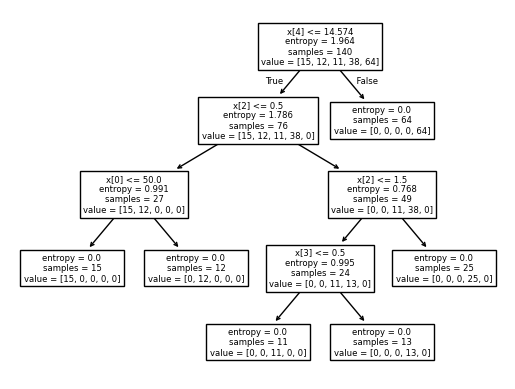

In [79]:
from sklearn.tree import plot_tree


plot_tree(model)
plt.show()

Hence we have sucessfully implemented Decision Trees